# K-nearest Neighbors Algorithm

The assignment investigates KNN using the breast cancer dataset. 

## Part 1: Look at the dataset

In [9]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [10]:
import numpy as np
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

print('There are %d featuers' % np.count_nonzero(df.columns))
print('The target classes are', dataset.target_names)
print('The target classes signify the two classification category of the dataset, also the two possible prediction outcomes')
print('There are %d participants tested malignant' % np.sum(dataset.target == np.where(dataset.target_names == 'malignant')))
print('There are %d participants tested benign' % np.sum(dataset.target == np.where(dataset.target_names == 'benign')))

df['target'] = dataset.target_names[dataset.target]
df

There are 30 featuers
The target classes are ['malignant' 'benign']
The target classes signify the two classification category of the dataset, also the two possible prediction outcomes
There are 212 participants tested malignant
There are 357 participants tested benign


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


Visualize a few feautes of the dataset to see how the data is distributed. 

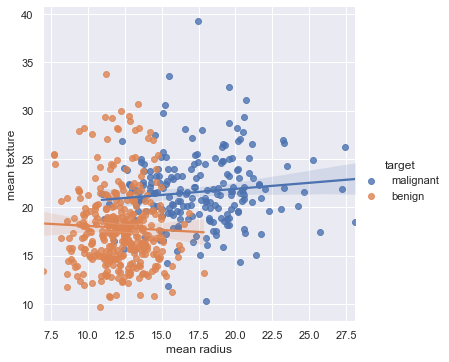

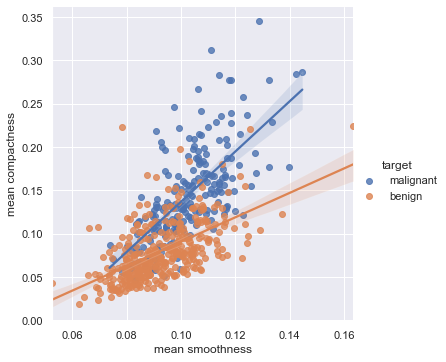

In [20]:
import seaborn as sns

sns.set()
sns.lmplot(x='mean radius', y='mean texture', data=df,  hue='target')

sns.lmplot(x='mean smoothness', y='mean compactness', data=df,  hue='target')

Data in the same class tends to fall into a close cluster, therefore we are using where the data is located to predict its class

Text(0.5, 1.0, 'standardized scale')

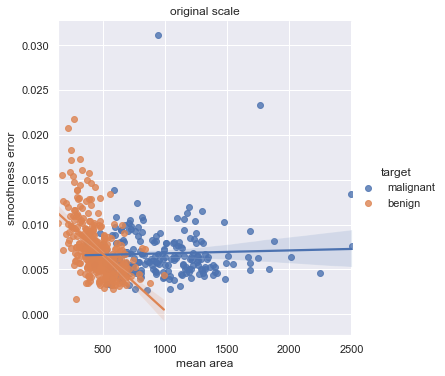

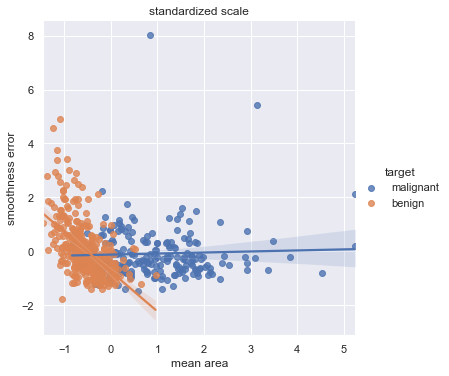

In [21]:
import matplotlib.pyplot as plt

# origianal dataframe with scales in decimals and thousands
sns.lmplot(x='mean area', y='smoothness error', data=df,  hue='target')
plt.title('original scale')

# standardized dataframe to normal distribution
df_std = df.copy()
mu,si = df.mean(), df.std()
#normalized  = (original - mu)/std 
df_std.iloc[:,:-1] -= mu # exclude last column of target in string
df_std.iloc[:,:-1]/= si
sns.lmplot(x='mean area', y='smoothness error', data=df_std,  hue='target')
plt.title('standardized scale')

Visually, the origianl and standardized graphs look identical in distrubibution. However, the first graph has scales ranging from decimals to thousands, so it is hard to compare them on such scale. The second graph has the scale normalized, so the numbers are more meaningful in comparison. Since points are now more spreadout on the same scale, it also helps with classification performance as KNN compute distance with less bias. 

## Part 2: KNN Classifier 
We are going to create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Then sweep its mean cross-validation accuracy for a KNN classifier with k from 1 to 100 to find the best value for k 


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

# split train and test datasets with 20% test size
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

# generate list of k values fom 1 to 100
k_vals = list(range(1,101))
k_scores = []

# repeat cross validate for all k values 
for k in k_vals:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  k_scores.append((k,scores.mean(), scores.std())) 



Text(0.5, 1.0, 'mean cross-validation accuracy for the KNN classifier at various k values ')

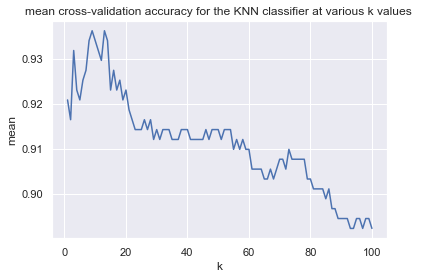

In [23]:
import matplotlib.pyplot as plt

k_scores = pd.DataFrame(np.array(k_scores), columns=['k', 'mean', 'std'])
sns.lineplot(x='k',y='mean', data=k_scores)
plt.title('mean cross-validation accuracy for the KNN classifier at various k values ')

Initially, as k increases, the accuray increases because the model becomes less biased when it calculats with more neighboring points. 
After certain point, the accruay starts falling as k increases because of overfitting. 

In [24]:
k_scores.sort_values('mean', ascending=False)

,k,mean,std
8,9.0,0.936264,0.027274
12,13.0,0.936264,0.025441
13,14.0,0.934066,0.025059
7,8.0,0.934066,0.025059
9,10.0,0.934066,0.021978
...,...,...,...
98,99.0,0.894505,0.011207
92,93.0,0.892308,0.014579
93,94.0,0.892308,0.014579
96,97.0,0.892308,0.012815


By sorting all the obtained k values, we can see the highhest accuray is obtained at k = 9 with accuray of 93.6%

To varify the result, test the k value on test set.

In [25]:
from sklearn.metrics import accuracy_score

# randomly selects 5 k values, but also adds the selected value of 9 for comparison
ks = np.random.randint(1,100,5)
ks = np.insert(ks,0,9)

for k in ks:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  accuracy = accuracy_score(y_test, knn.predict(X_test))
  print('k=%d, test set accuracy is %f %%'%(k, accuracy * 100))


k=9, test set accuracy is 96.491228 %
k=44, test set accuracy is 95.614035 %
k=47, test set accuracy is 94.736842 %
k=16, test set accuracy is 96.491228 %
k=82, test set accuracy is 92.982456 %
k=82, test set accuracy is 92.982456 %


The best accuracy is achieved at the tuned values of k=9, therefore it proves the cross validation worked

## Part 3: Playing with the features
In the last practice, we used all the features in our dataset to classify the tumors. Now we want to see: 
* Are all of these features necessary to get the same level of accuracy on the test set? 
* Is it possible to get better accuracy with fewer features? 
* Which features are essential to get 95\% of the accuracy? The minimum number of features is desired.

----

#### Are all of these features necessary to get the same level of accuracy on the test set? 
Some features are not necessary because they do not have significant influence on the model. Having too many features can even decrease accuracy because the classifier is overfitted, not general enough to make correct prediction.

For instance, if two features are correlated, meaning they have the same effect on the dependant variable, then one of the two features can be dropped.

<AxesSubplot:>

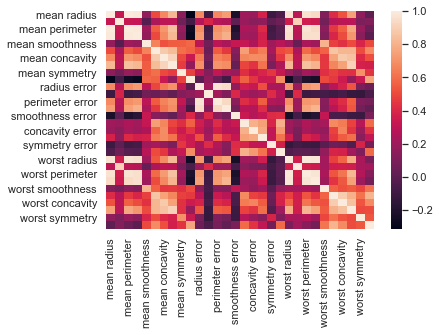

In [26]:
# correlation between features
corr = df.corr()
sns.heatmap(corr)



Low variance features are not as relavant in the KNN model because there are not many variations to distinguish the distance difference. By calculating the standard deviation, we can find that many features has a std of less than 1, while some other features have much greater std's. Features with small std has little impact on the model, therefore they can be removed to improve calculation speed and reduce risk of overfitting. 

In [27]:
df.std().sort_values(ascending=False)

worst area                 569.356993
mean area                  351.914129
area error                  45.491006
worst perimeter             33.602542
mean perimeter              24.298981
worst texture                6.146258
worst radius                 4.833242
mean texture                 4.301036
mean radius                  3.524049
perimeter error              2.021855
texture error                0.551648
radius error                 0.277313
worst concavity              0.208624
worst compactness            0.157336
mean concavity               0.079720
worst concave points         0.065732
worst symmetry               0.061867
mean compactness             0.052813
mean concave points          0.038803
concavity error              0.030186
mean symmetry                0.027414
worst smoothness             0.022832
worst fractal dimension      0.018061
compactness error            0.017908
mean smoothness              0.014064
symmetry error               0.008266
mean fractal

#### Is it possible to get better accuracy with fewer features? 

In [33]:


# eliminate features using backward elimination

# use regression model to calculate features' p-value, discard feature with p > 0.05
# assume null hypothesis to be “the selected feature does not have any effect on the classification”

import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
    return x, columns

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)


SL = 0.05
X_train_new, selected_featues = backwardElimination(X_train, y_train, SL, df.columns[:-1].values)
print('%d original features' % dataset.data.shape[1])
print('reduced feature numbers to %d' % selected_featues.size)

30 original features
reduced feature numbers to 14


In [31]:
# prepare training dataset with reduced features
X_train_new = pd.DataFrame(X_train_new, columns=selected_featues)
X_test = pd.DataFrame(X_test, columns=dataset.feature_names)
X_test_new = X_test.loc[:, X_test.columns.isin(selected_featues)]

In [32]:
# test accuracy
k_vals = list(range(1,20))
accuracies = []
for k in k_vals: 
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_new, y_train)
  accuracy = accuracy_score(y_test, knn.predict(X_test_new))
  accuracies.append(accuracy)
accuracies = np.array(accuracies)
print('best accuracy is  %f%%'% (np.max(accuracies)*100))


best accuracy is  96.491228%


With reduced number of features, the accuray is at 96.49%. It stayed at the same level compared to having all 30 features. 

Selecting less features doesn't always increase or decrease accuracy. It depends on having the right number of features because it is a bias-variance tradeoff.
Having too many features means the model can be overfitted and too sensitive to new data, while having too little features can make the model biased since it's not optimal. 


#### Which features are essential to get 95\% of the accuracy? 


With the above 14 features, the accuracy is above the 95% target, but since our goal is to get the mimimum amount of features, we can reduce more features and experiment with the result.


Features are selected by evaluating each feature with a score and only select the best scores. In this case, chi-squared statistic is used as the estimator. It measures dependence between stochasitc variables, so it eliminates features that are likely to be independent, irrelevant to the classfication model.

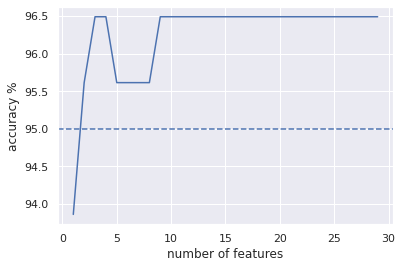

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

# test number of features requresied to acheive target accuracy
num_features = np.arange(1,30)
scores = []
for n in num_features: 
  selector = SelectKBest(chi2, k=n)
  X_new = selector.fit_transform(X_train, y_train)
  X_test_new = selector.transform(X_test)
  dataset.feature_names[selector.get_support()]

  knn = neighbors.KNeighborsClassifier(n_neighbors=9)
  knn.fit(X_new, y_train)
  accuracy = accuracy_score(y_test, knn.predict(X_test_new))
  # print('%d features, Test set accuracy is %f %%'%(n, accuracy * 100))
  scores.append([n,accuracy*100])

scores = pd.DataFrame(np.array(scores), columns=['number of features','accuracy %'])
sns.lineplot(x='number of features',y='accuracy %', data=scores)
plt.axhline(95, ls='--')


* From the plot we can see that we can achieve a 95% accuray with minimum of 2 features. 
* The features are **worst area and mean area**. 
* They indeed have the highest score with lowest p-values.


In [25]:
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X_train, y_train)
# name of the selected 2 features
print(dataset.feature_names[selector.get_support()])

['mean area' 'worst area']


In [19]:
feature_scores = pd.DataFrame({'feature name':dataset.feature_names,  'score':selector.scores_, 'p-value': selector.pvalues_})
feature_scores.sort_values(by='score', ascending=False).head(10)

,feature name,score,p-value
23,worst area,92917.511517,0.000000e+00
3,mean area,43588.247204,0.000000e+00
13,area error,7362.331681,0.000000e+00
22,worst perimeter,2928.892544,0.000000e+00
2,mean perimeter,1585.422910,0.000000e+00
20,worst radius,396.202415,3.695139e-88
0,mean radius,210.952274,8.513513e-48
12,perimeter error,202.743541,5.261987e-46
21,worst texture,135.206566,2.975458e-31
1,mean texture,68.683546,1.156014e-16


## Part 4: Standardization
Try to apply KNN with and without standardizing the data. Experiment with how standardization affects the accuracy. 

In [35]:
from sklearn import preprocessing

In [36]:
# split dataset between training and testing
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=1)

# fit the standard scaler only with training data 
scaler = preprocessing.StandardScaler().fit(X_train)

# standardize both training and testing data 
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

Text(0.5, 1.0, 'KNN cross validation score with/without standardization')

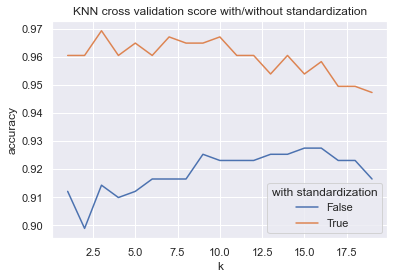

In [37]:
# cross validation with standardization 
k_vals = list(range(1,20))
k_scores_s = []
for k in k_vals:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train_s, y_train, cv=5)
  k_scores_s.append((k,scores.mean(), scores.std(), True)) 

# cross validation without standardization
k_scores = []
for k in k_vals:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  k_scores.append((k,scores.mean(), scores.std(), False)) 

# plot result 
k_scores_all = pd.DataFrame(np.concatenate((k_scores_s,k_scores)), columns=['k', 'accuracy', 'std', 'with standardization'])
k_scores_all['with standardization'] = k_scores_all['with standardization'].astype(bool)
sns.lineplot(x='k',y='accuracy', data=k_scores_all, hue='with standardization')
plt.title('KNN cross validation score with/without standardization')


In [38]:
# best accuracy achieved from cross validations, and their corresponding k values
k_scores = pd.DataFrame(k_scores, columns=['k', 'accuracy', 'std', 'with standardization'])
k_scores_s = pd.DataFrame(k_scores_s, columns=['k', 'accuracy', 'std', 'with standardization'])

no_std_best = k_scores.iloc[k_scores['accuracy'].idxmax()]
with_std_best = k_scores_s.iloc[k_scores_s['accuracy'].idxmax()]

print('cross validation with standardization')
print(with_std_best)
print('---------------------------------------')
print('cross validation without standardization')
print(no_std_best)

cross validation with standardization
k                               3
accuracy                 0.969231
std                     0.0244737
with standardization         True
Name: 2, dtype: object
---------------------------------------
cross validation without standardization
k                             15
accuracy                0.927473
std                      0.01916
with standardization       False
Name: 14, dtype: object


In [39]:
# test KNN with obtained k values

k_std = with_std_best['k']
k_no_std = no_std_best['k']

# test with standardization
knn = neighbors.KNeighborsClassifier(n_neighbors=k_std)
knn.fit(X_train_s,y_train)
scores = accuracy_score(y_test, knn.predict(X_test_s))
print('test accuracy with standardization: %.2f%%' % (scores*100))

# test without standardization
knn = neighbors.KNeighborsClassifier(n_neighbors=k_no_std)
knn.fit(X_train,y_train)
scores = accuracy_score(y_test, knn.predict(X_test))
print('test accuracy without standardization: %.2f%%' % (scores*100))


test accuracy with standardization: 94.74%
test accuracy without standardization: 92.11%


In both cases of cross validation and actual prediction, standardizing dataset improves accuracy. The original data 
have different units with different scales, with standardization, the data's distribution is reshaped to fit a normal distribution, visually more spread out in scale. It also helps KNN with calculating distance, making it less biased. therefore increasing the predictive performance. 
